In [40]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package
from copy import copy
from qca import QCA
from states import make_state
from mpl_toolkits import mplot3d
from matplotlib import cm
from scipy.optimize import curve_fit
from os import makedirs
import matplotlib.pyplot as plt
import measures as ms
import numpy as np
%matplotlib inline


from matplotlib import rc
fontstyle = {
    "pdf.fonttype": 42,
    "text.usetex": True,
    "text.latex.preamble":r"\usepackage{amsfonts}",
    "font.family": "serif",
    "axes.labelsize": 9,
    'axes.titlesize': 9,
    "font.size": 9,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
}
plt.rcParams.update(fontstyle)
rc('mathtext', default='regular')
rc("text", usetex=True)

In [41]:
import qca
import core1d
import measures
from importlib import reload
reload(qca)
reload(core1d)
reload(measures)
from qca import QCA

In [91]:
der = "/home/lhillber/documents/research/cellular_automata/qeca/qca/data"
params_template = dict(
              L=11,
              T=1000.0,
              dt=1.0,
              R=6,
              r=1,
              V="H",
              BC="1-00",
              IC="c1_f0",
              E=0.0068,
              N=1000,
              totalistic=False,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [36]:
def exponential_fit(x, y):
    m, b = np.polyfit(x, np.log(y), deg=1)
    def func(x):
        return np.exp(b + m*x)
    return m, b, func

In [37]:
params1 = copy(params_template)
params2 = copy(params_template)
params2.update({"E":0.0, "N":1})
Q1.close()
Q2.close()
Q1 = QCA(params1, der=der)
Q2 = QCA(params2, der=der)
F = Q1.F()
CF = Q1.CF(1)

In [38]:
Cdiff = 1 - (Q2.C(1)[1:]-Q1.C(1)[1:])/Q2.C(1)[1:]
t = Q1.ts[1:]

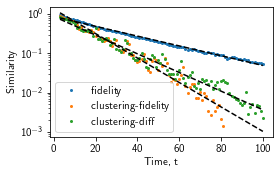

In [42]:
fig, ax = plt.subplots(1,1, figsize=(4, 2.4))
tmax=100
x = t[2:tmax]
yF = F[2:tmax]
yC = CF[2:tmax]
mask = yC > 0
yCdiff = Cdiff[2:tmax]
mF, bF, funcF = exponential_fit(x, yF)
mC, bC, funcC = exponential_fit(x[mask], yC[mask])
mCdiff, bCdiff, funcCdiff = exponential_fit(x, yCdiff)
ax.plot(x, yF, marker="o", ms=2, ls="none", label="fidelity")
ax.plot(x, yC, marker="o", ms=2, ls="none", label="clustering-fidelity")
ax.plot(x, yCdiff, marker="o", ms=2, ls="none", label="clustering-diff")
ax.plot(x, funcF(x), c="k", ls="--")
ax.plot(x, funcC(x), c="k", ls="--")
ax.plot(x, funcCdiff(x), c="k", ls="--")
#ax.text(55, 2.5e-1, f"t0 = {np.round(mF,3)}")
#ax.text(45, 1e-2, f"t0 = {np.round(mC,3)}")
#ax.text(65, .8, f"t0 = {np.round(mCdiff,3)}")
ax.set_ylabel("Similarity")
ax.set_xlabel("Time, t")
ax.set_yscale("log")
ax.legend()
plt.savefig("similarity_fits.pdf", bbox_inches="tight")

<ipython-input-3-1517a17968c2>:2: RuntimeWarning: invalid value encountered in log
  m, b = np.polyfit(x, np.log(y), deg=1)


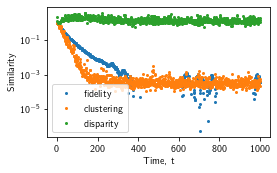

In [8]:
fig, ax = plt.subplots(1,1, figsize=(4, 2.4))
tmax = 1000
x = t[:tmax]
yF = F[:tmax]
yC = C[:tmax]
yY = Y[:tmax]
mF, bF, funcF = exponential_fit(x, yF)
mC, bC, funcC = exponential_fit(x, yC)
mY, bY, funcY = exponential_fit(x, yY)
ax.plot(x, yF, marker="o", ms=2, ls="none", label="fidelity")
ax.plot(x, yC, marker="o", ms=2, ls="none", label="clustering")
ax.plot(x, yY, marker="o", ms=2, ls="none", label="disparity")
ax.set_ylabel("Similarity")
ax.set_xlabel("Time, t")
ax.set_yscale("log")
ax.legend()
plt.savefig("similarity_full-time.pdf", bbox_inches="tight")

In [74]:
from matrix import ops, listkron, commute
from core1d import rule_op

In [75]:
U = rule_op("D", 4, 2, totalistic=True)

[[1.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 1.+0.j]]


In [76]:
np.sum(commute(listkron([U, ops["I"],ops["I"]]),listkron([ops["I"],ops["I"], U])))

0j

In [190]:
import qca
import core1d
import measures
from importlib import reload
reload(qca)
reload(core1d)
reload(measures)
from qca import QCA

der = "/home/lhillber/documents/research/cellular_automata/qeca/qca/data"
params_template = dict(
              L=19,
              T=50000.0,
              dt=1.0,
              R=14,
              r=1,
              V="H",
              BC="0",
              IC="c3_f1",
              E=0,
              N=1,
              totalistic=False,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [191]:
Q=QCA(params_template, der=der)
Q.run(tasks=["rhoj","rhojk", "ebipart"], recalc=True)
Q.available_tasks


10 January 2021, 21:50:05
Updated: 45acf5fd56ece00671dd95a69e20a71f4c552d48
    with ['rhoj', 'rhojk', 'ebipart']
Parameters: {'L': 19, 'T': 50000.0, 'dt': 1.0, 'R': 14, 'r': 1, 'V': 'H', 'IC': 'c3_f1', 'BC': '0', 'E': 0.0, 'N': 1, 'trotter': True, 'symmetric': False, 'totalistic': False, 'hamiltonian': False}
Available data: ['ebipartdata', 'params', 'rhoj', 'rhojk']
Total file size: 3067.27 MB
Took: 96822.49 s
Data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/45acf5fd56ece00671dd95a69e20a71f4c552d48.hdf5



['ebipartdata', 'params', 'rhoj', 'rhojk']

In [171]:
import os
os.remove("/home/lhillber/documents/research/cellular_automata/qeca/qca/data/af323fca2ea3eb9fc8b0b2c4f45a3b8c40138b9f.hdf5")

<AxesSubplot:xlabel='Cut $\\ell$', ylabel='Time $t$'>

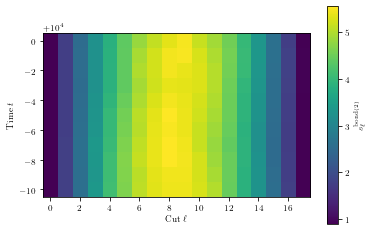

In [189]:
Q.plot("sbipart_2", tmin=9990, tmax=10000)

2.4305555555555554

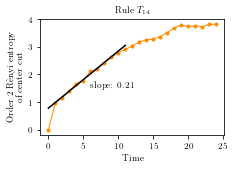

In [149]:
from figures import colors
t0=10
xs = np.linspace(0,11,75)
x, y = Q.ts[1:t0],(Q.sbisect(order=2))[1:t0]
m, b = np.polyfit(x,y,1)

fig, ax = plt.subplots(1,1, figsize=(3.125,2.3))
ax.plot(Q.ts[:25],(Q.sbisect(order=2))[:25],
        marker="o", c=colors[14], ms=3, lw=1)
ax.plot(xs, m*xs+b, c="k")

ax.set_ylabel(r"Order 2 R\`enyi entropy"+"\n of center cut")
ax.set_xlabel(r"Time")
ax.set_title("Rule $T_{14}$")
ax.text(6, 1.5, f"slope: {round(m,2)}")
plt.subplots_adjust(left=0.16, bottom=0.18, right=0.98)
plt.savefig("figures/rule-14_balistic-entropy.pdf")

<ipython-input-155-8fe2123bf987>:2: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(Q.ts[1:10],(Q.sbisect(order=2)/(m*Q.ts))[1:10],


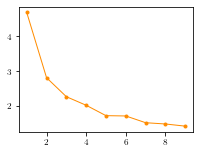

In [155]:

fig, ax = plt.subplots(1,1, figsize=(3.125,2.3))
ax.plot(Q.ts[1:10],(Q.sbisect(order=2)/(m*Q.ts))[1:10],
        marker="o", c=colors[14], ms=3, lw=1)



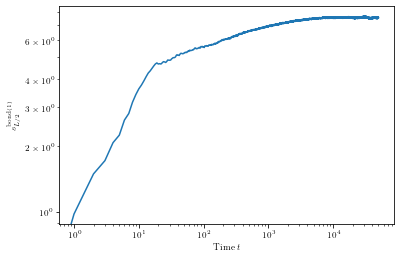

In [197]:
ax = Q.plot("sbisect_1")
ax.set_xscale("log")
ax.set_yscale("log")

In [164]:
Q.file_size()

file size (MB): 4243.69


4243.69385

In [42]:
from qca import defaults

In [51]:
der = "/home/lhillber/documents/research/cellular_automata/qeca/qca/data"
params_template = dict(
              L=16,
              T=100.0,
              dt=1.0,
              R=6,
              r=1,
              V="H",
              BC="0",
              IC="c3_f1_p0-t90",
              E=0,
              N=1,
              totalistic=False,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [52]:
Q = QCA(params_template, der=der)
#Q.close()
Q.run(tasks=["rhoj", "rhojk"])


11 January 2021, 15:05:42
Updated: 24bffeb7af782b9ea987d8de0041e45757feb708
    with ['rhoj', 'rhojk']
Parameters: {'L': 16, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'H', 'IC': 'c3_f1_p0-t90', 'BC': '0', 'E': 0.0, 'N': 1, 'trotter': True, 'symmetric': False, 'totalistic': False, 'hamiltonian': False}
Available data: ['params', 'rhoj', 'rhojk']
Total file size: 3.21 MB
Took: 15.19 s
Data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/24bffeb7af782b9ea987d8de0041e45757feb708.hdf5



<AxesSubplot:xlabel='Time $t$', ylabel='$\\mathcal{C}^{(1)}$'>

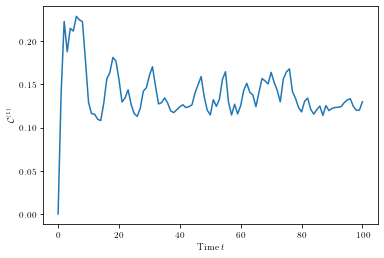

In [56]:
Q.plot("C_1")